1. DATA COLLECTING

In [2]:
import pandas as pd
import seaborn as sns

dataset = sns.load_dataset('titanic')
dataset.to_csv('Titanic-Dataset.csv')
dataset

C:\Users\shaha\AppData\Local\Temp\ipykernel_8676\2809356544.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,female,36.0,1,2,120.0000,S,First,woman,False,B,Southampton,yes,False
764,0,3,male,16.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
765,1,1,female,51.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
766,0,1,male,NaN,0,0,39.6000,C,First,man,True,NaN,Cherbourg,no,True


2. HANDLING MISSING VALUES

In [3]:
dataset.isna().sum()

survived         0
pclass           0
sex              0
age            155
sibsp            0
parch            0
fare             0
embarked         1
class            0
who              0
adult_male       0
deck           591
embark_town      1
alive            1
alone            1
dtype: int64

AS THERE ARE ABOUT 80% MISSING VALUES IN DECK LETS REMOVE THE COLUMNS AS IT IS POOR DATA

In [4]:
dataset.drop('deck', axis = 1,inplace = True)
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,female,36.0,1,2,120.0000,S,First,woman,False,Southampton,yes,False
764,0,3,male,16.0,0,0,7.7750,S,Third,man,True,Southampton,no,True
765,1,1,female,51.0,1,0,77.9583,S,First,woman,False,Southampton,yes,False
766,0,1,male,NaN,0,0,39.6000,C,First,man,True,Cherbourg,no,True


NOW FILLING AGE COLUMN, FILL WITH MEAN AS THE DATA IS NORMALLY DISTRIBUTED

In [5]:
dataset['age'] = dataset['age'].fillna(dataset['age'].mean())
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.00000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,female,36.00000,1,2,120.0000,S,First,woman,False,Southampton,yes,False
764,0,3,male,16.00000,0,0,7.7750,S,Third,man,True,Southampton,no,True
765,1,1,female,51.00000,1,0,77.9583,S,First,woman,False,Southampton,yes,False
766,0,1,male,29.92646,0,0,39.6000,C,First,man,True,Cherbourg,no,True


REMOVING THE REMAINING MISSING VALUES

In [6]:
dataset = dataset.dropna().reset_index(drop=True)
dataset.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

3. REMOVE DUPLICATES

AS THERE ARE NO NAMES OR UNIQUE ID's TAKING SOME PARAMETERS THAT ENSURES THE COLUMN IS DUPLICATE

In [7]:
dataset.duplicated().sum()

92

In [8]:
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.00000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,1,3,male,20.00000,0,0,7.2292,C,Third,man,True,Cherbourg,yes,True
762,1,1,female,36.00000,1,2,120.0000,S,First,woman,False,Southampton,yes,False
763,0,3,male,16.00000,0,0,7.7750,S,Third,man,True,Southampton,no,True
764,1,1,female,51.00000,1,0,77.9583,S,First,woman,False,Southampton,yes,False


In [9]:
dataset = dataset.drop_duplicates().reset_index(drop=True)
dataset.duplicated().sum()

0

ALSO THERE ARE DUPLICATE COLUMNS SO REMOVE THAT TOO

In [10]:
#alone column also irrelevant as aleady checking spouse and family
dataset.drop(['who','alive','embarked','alone'],axis=1,inplace =True)

4. TYPE CONVERSION

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     674 non-null    int64   
 1   pclass       674 non-null    int64   
 2   sex          674 non-null    object  
 3   age          674 non-null    float64 
 4   sibsp        674 non-null    int64   
 5   parch        674 non-null    int64   
 6   fare         674 non-null    float64 
 7   class        674 non-null    category
 8   adult_male   674 non-null    bool    
 9   embark_town  674 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 43.7+ KB


In [12]:
dataset[['sex','embark_town']] = dataset[['sex','embark_town']].astype('category')
dataset[['age','fare']] = dataset[['age','fare']].astype('int')
dataset['adult_male'] = dataset['adult_male'].astype('int')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town
0,0,3,male,22,1,0,7,Third,1,Southampton
1,1,1,female,38,1,0,71,First,0,Cherbourg
2,1,3,female,26,0,0,7,Third,0,Southampton
3,1,1,female,35,1,0,53,First,0,Southampton
4,0,3,male,35,0,0,8,Third,1,Southampton
...,...,...,...,...,...,...,...,...,...,...
669,1,3,male,20,0,0,7,Third,1,Cherbourg
670,1,1,female,36,1,2,120,First,0,Southampton
671,0,3,male,16,0,0,7,Third,1,Southampton
672,1,1,female,51,1,0,77,First,0,Southampton


HANDLE CATEGORICAL DATA

ORDINAL ENCODING FOR DATA THAT HAS A RELATION OR IMPLICIT ORDERING

In [13]:
from sklearn.preprocessing import OrdinalEncoder

set_category=[['Third' , 'Second' , 'First']]
orden = OrdinalEncoder(categories=set_category)
dataset['class'] = orden.fit_transform(dataset[['class']]).astype('int')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town
0,0,3,male,22,1,0,7,0,1,Southampton
1,1,1,female,38,1,0,71,2,0,Cherbourg
2,1,3,female,26,0,0,7,0,0,Southampton
3,1,1,female,35,1,0,53,2,0,Southampton
4,0,3,male,35,0,0,8,0,1,Southampton
...,...,...,...,...,...,...,...,...,...,...
669,1,3,male,20,0,0,7,0,1,Cherbourg
670,1,1,female,36,1,2,120,2,0,Southampton
671,0,3,male,16,0,0,7,0,1,Southampton
672,1,1,female,51,1,0,77,2,0,Southampton


ONE-HOT ENCODING FOR REST OF THE CATEGORICAL FEATURES

In [14]:
from sklearn.preprocessing import OneHotEncoder

hoten = OneHotEncoder(sparse_output=False)
encoded = hoten.fit_transform(dataset[['sex']])
featured_cols = hoten.get_feature_names_out(['sex'])
df = pd.DataFrame(encoded , columns=featured_cols)
dataset = pd.concat([dataset,df],axis=1)
dataset = dataset.drop(['sex'] , axis = 1)
dataset

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
0,0,3,22,1,0,7,0,1,Southampton,0.0,1.0
1,1,1,38,1,0,71,2,0,Cherbourg,1.0,0.0
2,1,3,26,0,0,7,0,0,Southampton,1.0,0.0
3,1,1,35,1,0,53,2,0,Southampton,1.0,0.0
4,0,3,35,0,0,8,0,1,Southampton,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
669,1,3,20,0,0,7,0,1,Cherbourg,0.0,1.0
670,1,1,36,1,2,120,2,0,Southampton,1.0,0.0
671,0,3,16,0,0,7,0,1,Southampton,0.0,1.0
672,1,1,51,1,0,77,2,0,Southampton,1.0,0.0


LABEL ENCODING 

In [15]:
from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
dataset['embark_town'] = laben.fit_transform(dataset['embark_town'])
dataset

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
0,0,3,22,1,0,7,0,1,2,0.0,1.0
1,1,1,38,1,0,71,2,0,0,1.0,0.0
2,1,3,26,0,0,7,0,0,2,1.0,0.0
3,1,1,35,1,0,53,2,0,2,1.0,0.0
4,0,3,35,0,0,8,0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
669,1,3,20,0,0,7,0,1,0,0.0,1.0
670,1,1,36,1,2,120,2,0,2,1.0,0.0
671,0,3,16,0,0,7,0,1,2,0.0,1.0
672,1,1,51,1,0,77,2,0,2,1.0,0.0


VISUALIZATION USING SEABORN

USE HISTPLOT FOR CHECKING TYPE OF DISTRIBUTION

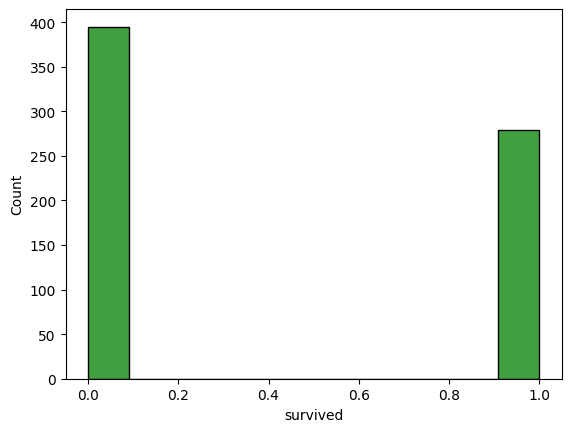

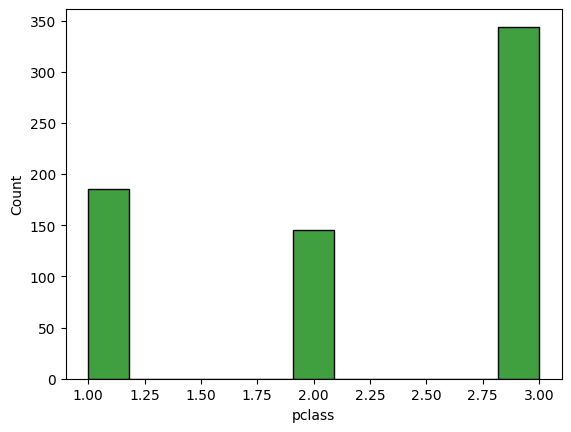

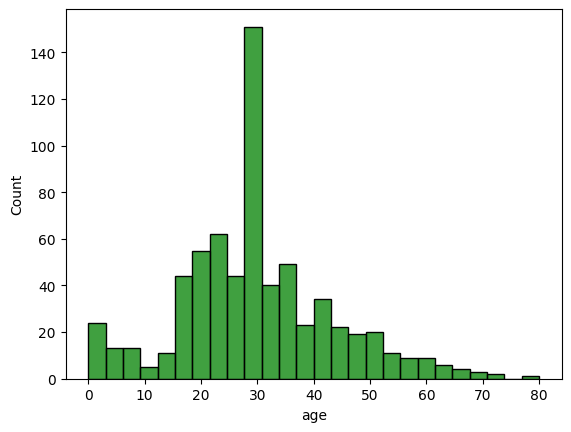

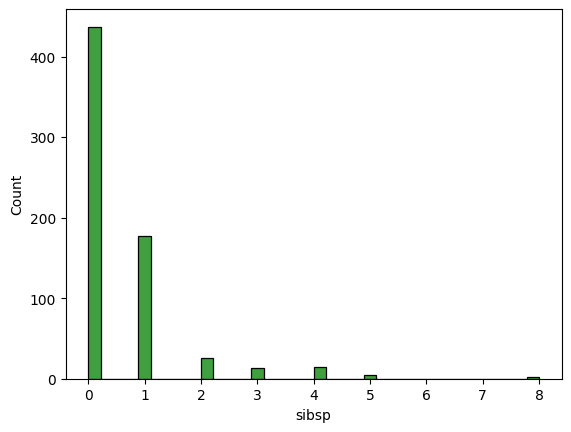

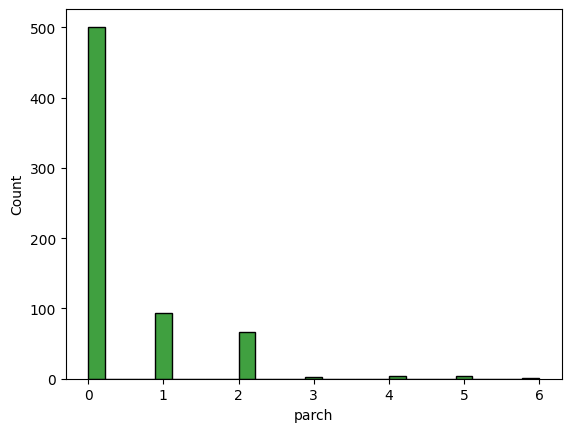

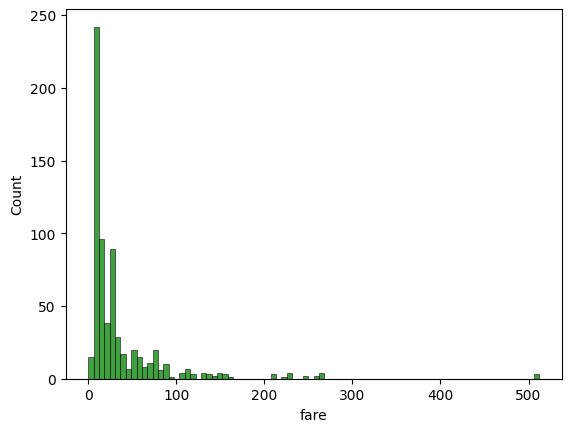

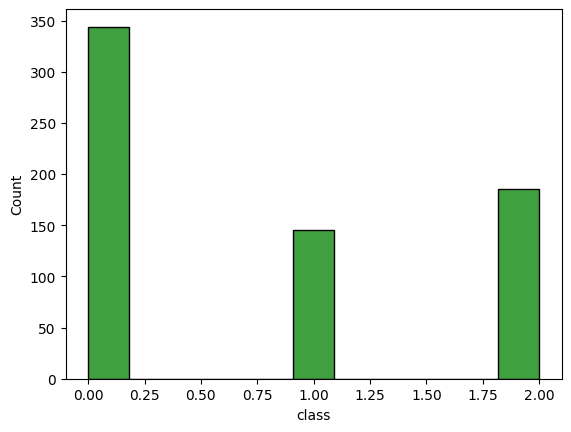

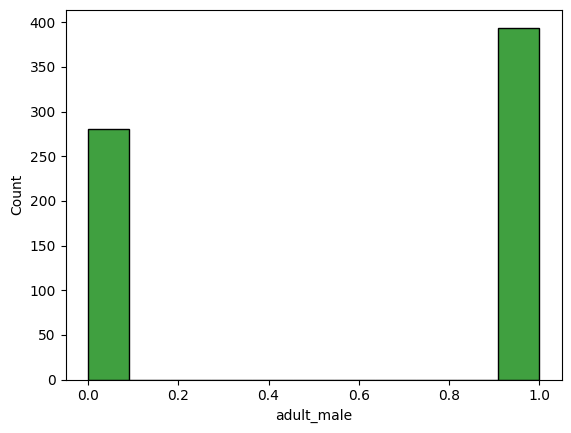

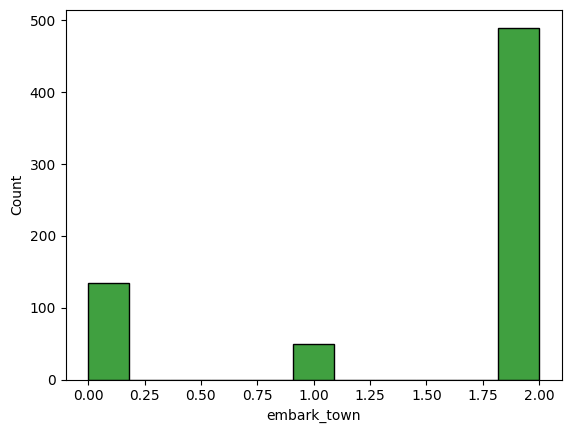

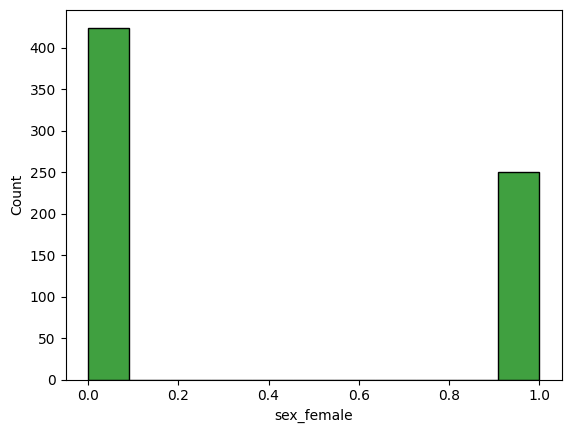

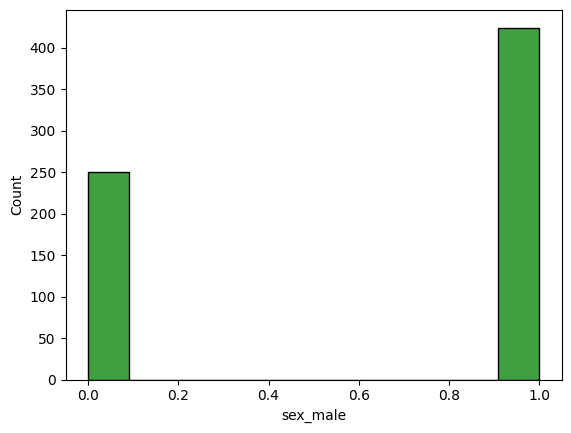

In [16]:
import matplotlib.pyplot as plt

for i in dataset:
    sns.histplot(data=dataset,x=i , color='g')
    plt.show()

BOXPLOT FOR RELATIONSHIP AND DETECTING OUTLIERS

<Axes: xlabel='age', ylabel='survived'>

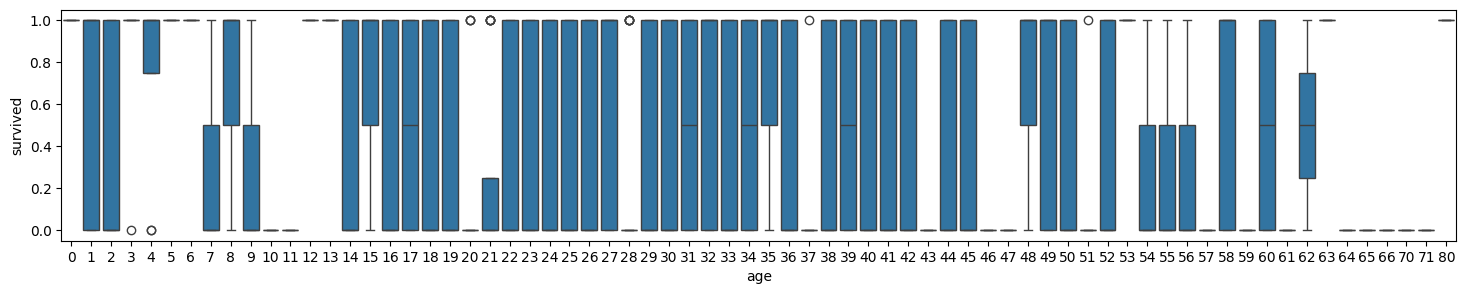

In [17]:
#check relationships
plt.figure(figsize=(18,3))
sns.boxplot(data=dataset, x = 'age' , y = 'survived')

<Axes: xlabel='class', ylabel='age'>

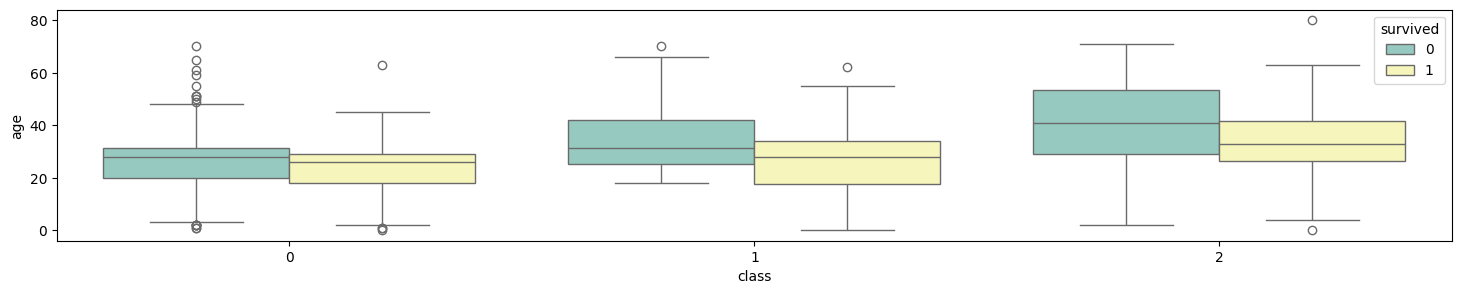

In [18]:
plt.figure(figsize=(18, 3))
sns.boxplot(data=dataset, x='class',y='age', hue='survived', palette='Set3')

In [19]:
dataset.groupby('survived')['class'].value_counts()

survived  class
0         0        255
          1         70
          2         70
1         2        115
          0         89
          1         75
Name: count, dtype: int64

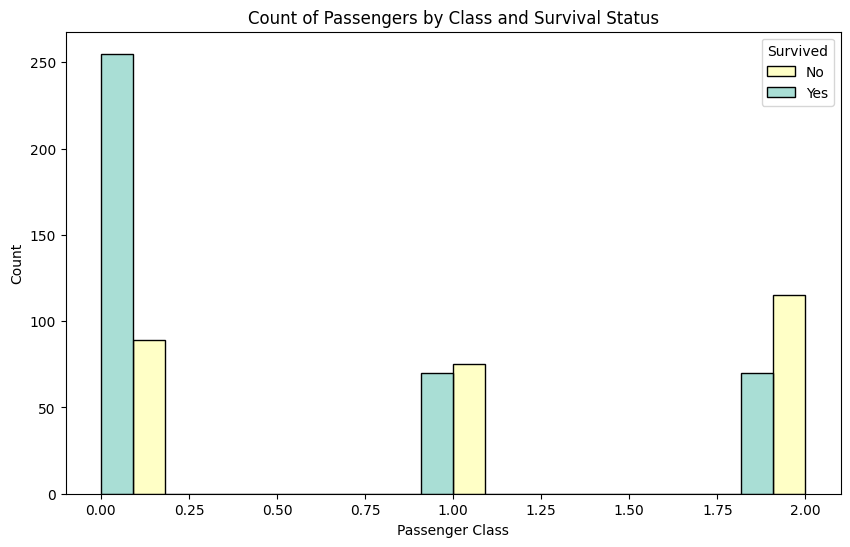

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='class', hue='survived', palette='Set3',multiple='dodge')
plt.title('Count of Passengers by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


<Axes: xlabel='sex_male', ylabel='survived'>

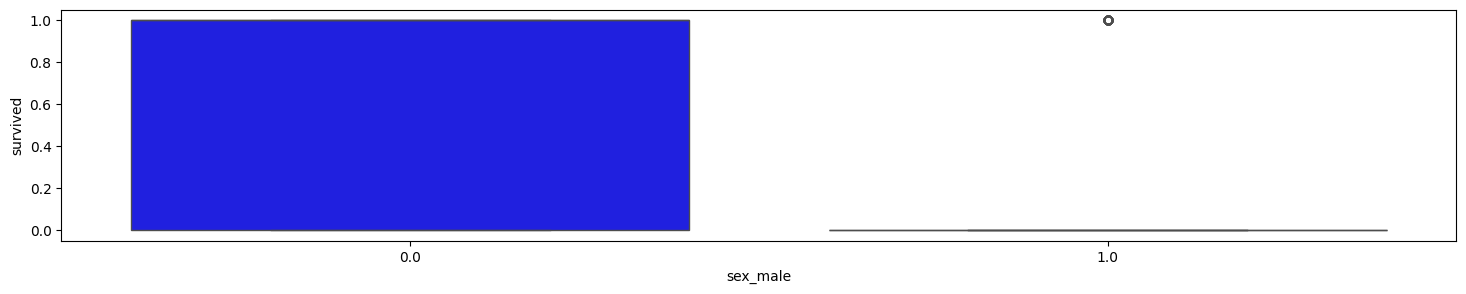

In [21]:
plt.figure(figsize=(18,3))
sns.boxplot(data=dataset, x = 'sex_male' , y = 'survived' , color='b')

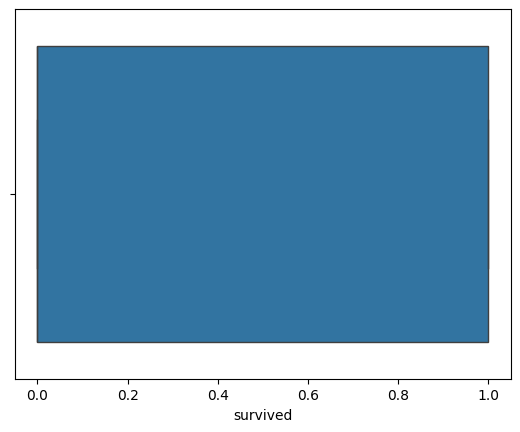

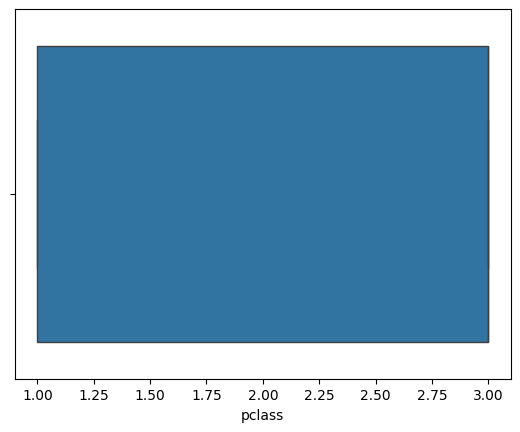

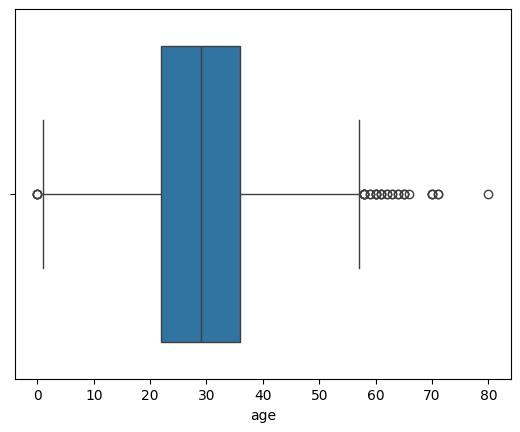

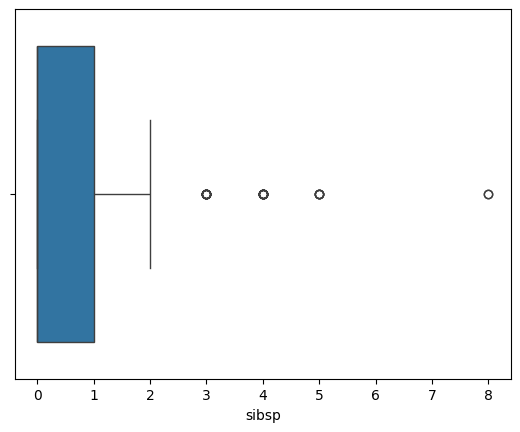

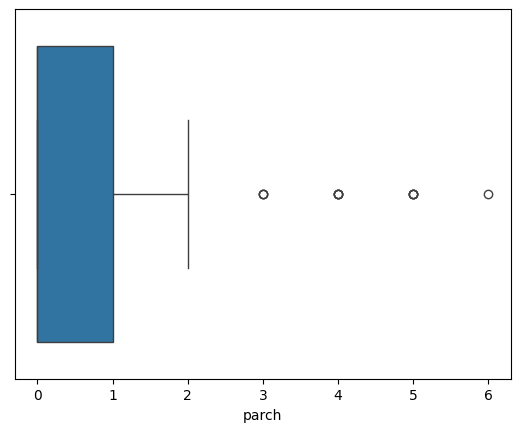

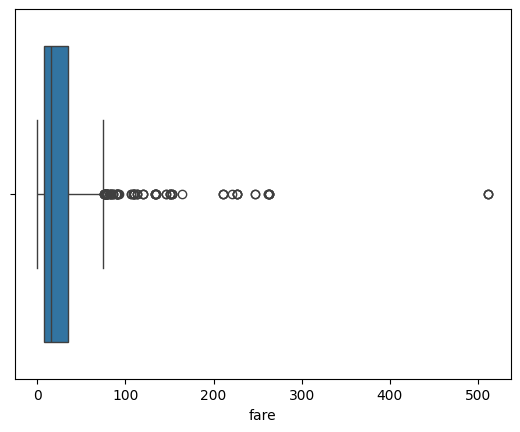

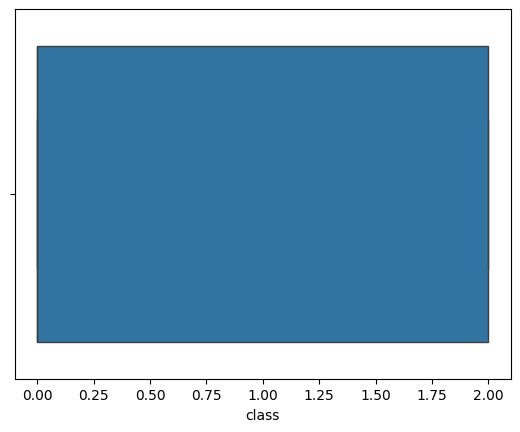

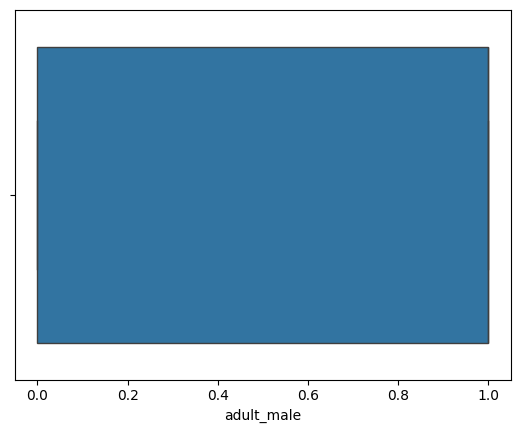

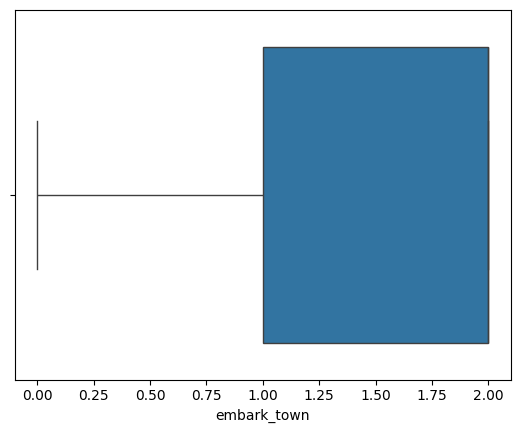

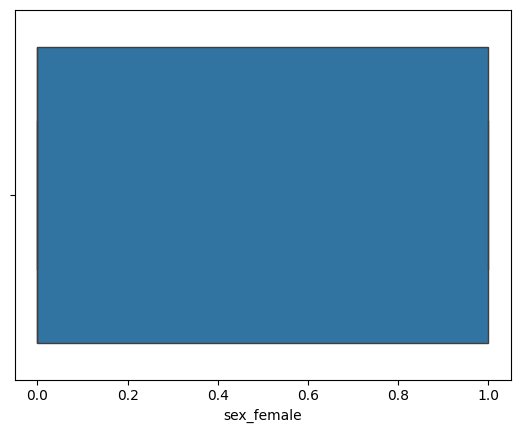

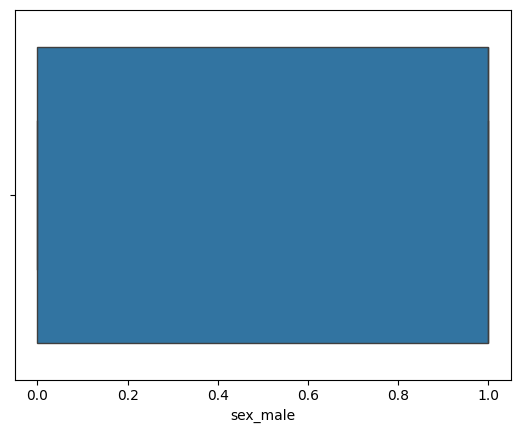

In [22]:
#detect outliers

for i in dataset:
    sns.boxplot(data=dataset , x=i )
    plt.show()

FROM VISUALIZATION UNDERSTOOD THAT SOME OF THE COLUMNS CONTAINS OUTLIERS 

THEY ARE : AGE , SIBSP , PARCH , FARE

BUT FROM DOMAIN KNOWLEDGE CAN UNDERSTAND THAT THERE ARE NO OUTLIERS IN SISBSP AND PARCH

In [23]:
dataset

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
0,0,3,22,1,0,7,0,1,2,0.0,1.0
1,1,1,38,1,0,71,2,0,0,1.0,0.0
2,1,3,26,0,0,7,0,0,2,1.0,0.0
3,1,1,35,1,0,53,2,0,2,1.0,0.0
4,0,3,35,0,0,8,0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
669,1,3,20,0,0,7,0,1,0,0.0,1.0
670,1,1,36,1,2,120,2,0,2,1.0,0.0
671,0,3,16,0,0,7,0,1,2,0.0,1.0
672,1,1,51,1,0,77,2,0,2,1.0,0.0


OUTLIERS REMOVAL

In [24]:
#REMOVE OUTLIERS IN AGE

upper = dataset['age'].quantile(0.95)
lower = dataset['age'].quantile(0.05)

dataset['age'] = dataset['age'].clip(lower,upper)
dataset

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
0,0,3,22.0,1,0,7,0,1,2,0.0,1.0
1,1,1,38.0,1,0,71,2,0,0,1.0,0.0
2,1,3,26.0,0,0,7,0,0,2,1.0,0.0
3,1,1,35.0,1,0,53,2,0,2,1.0,0.0
4,0,3,35.0,0,0,8,0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
669,1,3,20.0,0,0,7,0,1,0,0.0,1.0
670,1,1,36.0,1,2,120,2,0,2,1.0,0.0
671,0,3,16.0,0,0,7,0,1,2,0.0,1.0
672,1,1,51.0,1,0,77,2,0,2,1.0,0.0


In [25]:
#REMOVE OUTLIERS IN FARE

Q3 = dataset['fare'].quantile(0.75)
Q1 = dataset['fare'].quantile(0.25)

IQR = Q3-Q1

upper = Q3 + ( 1.5 * IQR)
lower = Q1 - ( 1.5 * IQR)

dataset['fare'] = dataset['fare'].clip(lower,upper)
dataset

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
0,0,3,22.0,1,0,7.0,0,1,2,0.0,1.0
1,1,1,38.0,1,0,71.0,2,0,0,1.0,0.0
2,1,3,26.0,0,0,7.0,0,0,2,1.0,0.0
3,1,1,35.0,1,0,53.0,2,0,2,1.0,0.0
4,0,3,35.0,0,0,8.0,0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
669,1,3,20.0,0,0,7.0,0,1,0,0.0,1.0
670,1,1,36.0,1,2,75.5,2,0,2,1.0,0.0
671,0,3,16.0,0,0,7.0,0,1,2,0.0,1.0
672,1,1,51.0,1,0,75.5,2,0,2,1.0,0.0


SPLITTING TRAIN AND TEST DATA

In [26]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(dataset , random_state = 0 , test_size = 0.2)
train

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
642,1,3,29.00,0,0,7.0,0,0,1,1.0,0.0
101,0,3,38.00,0,0,7.0,0,1,2,0.0,1.0
263,0,3,28.00,0,0,7.0,0,1,2,0.0,1.0
161,0,1,55.35,0,0,33.0,2,1,2,0.0,1.0
327,0,3,25.00,1,0,17.0,0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9,1,2,14.00,1,0,30.0,1,0,0,1.0,0.0
359,1,1,23.00,1,0,75.5,2,0,0,1.0,0.0
192,0,3,5.00,0,1,10.0,0,0,2,1.0,0.0
629,0,2,52.00,0,0,13.0,1,1,2,0.0,1.0


In [27]:
test

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
316,1,1,24.0,3,2,75.5,2,0,2,1.0,0.0
31,1,1,29.0,1,0,75.5,2,0,0,1.0,0.0
651,0,1,36.0,1,0,75.5,2,1,2,0.0,1.0
536,0,3,36.0,1,0,15.0,0,1,2,0.0,1.0
113,0,2,21.0,2,0,73.0,1,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
439,0,3,21.0,0,0,7.0,0,1,2,0.0,1.0
77,1,3,29.0,0,0,9.0,0,1,2,0.0,1.0
159,0,1,29.0,0,0,25.0,2,1,2,0.0,1.0
626,0,1,29.0,0,0,26.0,2,1,2,0.0,1.0


FEATURE TRANSFORMATION AND SCALING ( PERFORMING SEPERATELY TO AVOID DATA LEAKAGE )

TRAIN SET

MINMAX SCALING OR NORMALIZATION FOR AGE

In [28]:
min = train['age'].min()
max = train['age'].max()

train['age'] = ( train['age'] - min ) / ( max - min )
train

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
642,1,3,0.476663,0,0,7.0,0,0,1,1.0,0.0
101,0,3,0.655412,0,0,7.0,0,1,2,0.0,1.0
263,0,3,0.456802,0,0,7.0,0,1,2,0.0,1.0
161,0,1,1.000000,0,0,33.0,2,1,2,0.0,1.0
327,0,3,0.397219,1,0,17.0,0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9,1,2,0.178749,1,0,30.0,1,0,0,1.0,0.0
359,1,1,0.357498,1,0,75.5,2,0,0,1.0,0.0
192,0,3,0.000000,0,1,10.0,0,0,2,1.0,0.0
629,0,2,0.933466,0,0,13.0,1,1,2,0.0,1.0


STANDARDIZATION OR Z-SCORE SCALING FOR FARE

In [29]:
mean = train['fare'].mean()
std = train['fare'].std()

train['fare'] = ( train['fare'] - mean ) / std
train

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
642,1,3,0.476663,0,0,-0.835297,0,0,1,1.0,0.0
101,0,3,0.655412,0,0,-0.835297,0,1,2,0.0,1.0
263,0,3,0.456802,0,0,-0.835297,0,1,2,0.0,1.0
161,0,1,1.000000,0,0,0.260346,2,1,2,0.0,1.0
327,0,3,0.397219,1,0,-0.413896,0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9,1,2,0.178749,1,0,0.133926,1,0,0,1.0,0.0
359,1,1,0.357498,1,0,2.051303,2,0,0,1.0,0.0
192,0,3,0.000000,0,1,-0.708877,0,0,2,1.0,0.0
629,0,2,0.933466,0,0,-0.582457,1,1,2,0.0,1.0


TEST SET

MINMAX SCALING OR NORMALIZATION FOR AGE ( USING SCIKIT-LEARN )

In [30]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
test['age'] = scale.fit_transform(test[['age']])
test


,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
316,1,1,0.377358,3,2,75.5,2,0,2,1.0,0.0
31,1,1,0.476663,1,0,75.5,2,0,0,1.0,0.0
651,0,1,0.615690,1,0,75.5,2,1,2,0.0,1.0
536,0,3,0.615690,1,0,15.0,0,1,2,0.0,1.0
113,0,2,0.317776,2,0,73.0,1,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
439,0,3,0.317776,0,0,7.0,0,1,2,0.0,1.0
77,1,3,0.476663,0,0,9.0,0,1,2,0.0,1.0
159,0,1,0.476663,0,0,25.0,2,1,2,0.0,1.0
626,0,1,0.476663,0,0,26.0,2,1,2,0.0,1.0


STANDARDIZATION OR Z-SCORE SCALING FOR FARE

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test['fare'] = scaler.fit_transform(test[['fare']])
test

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
316,1,1,0.377358,3,2,1.963062,2,0,2,1.0,0.0
31,1,1,0.476663,1,0,1.963062,2,0,0,1.0,0.0
651,0,1,0.615690,1,0,1.963062,2,1,2,0.0,1.0
536,0,3,0.615690,1,0,-0.539991,0,1,2,0.0,1.0
113,0,2,0.317776,2,0,1.859630,1,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
439,0,3,0.317776,0,0,-0.870974,0,1,2,0.0,1.0
77,1,3,0.476663,0,0,-0.788228,0,1,2,0.0,1.0
159,0,1,0.476663,0,0,-0.126264,2,1,2,0.0,1.0
626,0,1,0.476663,0,0,-0.084891,2,1,2,0.0,1.0


SPLITTING TRAIN SET TO TRAIN AND VALIDATION SETS

In [32]:
train , validation = train_test_split(train , random_state = 0 , test_size = 0.2)
train

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
373,1,2,0.000000,1,1,-0.371756,1,0,2,0.0,1.0
308,0,1,0.655412,0,1,2.051303,2,1,2,0.0,1.0
588,1,1,0.476663,1,0,1.061009,2,0,2,1.0,0.0
500,0,3,0.695134,0,0,-0.835297,0,1,2,0.0,1.0
516,1,1,0.675273,1,1,2.051303,2,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
424,0,3,0.655412,0,0,-0.793157,0,1,2,0.0,1.0
253,0,1,0.476663,0,0,0.176066,2,1,2,0.0,1.0
666,0,3,0.456802,0,0,-0.835297,0,1,2,0.0,1.0
673,0,1,0.476663,0,0,0.513187,2,1,0,0.0,1.0


In [33]:
validation

,survived,pclass,age,sibsp,parch,fare,class,adult_male,embark_town,sex_female,sex_male
237,0,3,0.496524,1,0,-0.456036,0,1,2,0.0,1.0
560,1,1,0.536246,0,0,0.133926,2,1,0,0.0,1.0
634,0,3,0.556107,0,0,-0.835297,0,1,2,0.0,1.0
296,1,1,0.516385,0,2,2.051303,2,0,2,1.0,0.0
359,1,1,0.357498,1,0,2.051303,2,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
388,1,3,0.536246,0,0,-0.793157,0,1,2,0.0,1.0
284,1,1,0.000000,1,2,2.051303,2,0,2,0.0,1.0
434,1,3,1.000000,0,0,-0.751017,0,0,2,1.0,0.0
232,1,1,0.635551,1,1,1.061009,2,1,2,0.0,1.0


DATASET READY FOR MODEL

In [34]:
train.to_csv('Train set.csv')
validation.to_csv('Validation set.csv')
test.to_csv('Test set.csv')